In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

stocks_df = pd.read_csv('data/nasdaq_top_10_returns.csv', parse_dates=['Date'])
stocks_df = stocks_df.sort_values(by='Date')
tickers = stocks_df.columns[1:]

In [3]:

num_portfolios = 1000
num_stocks = len(tickers)
risk_free = 0

In [4]:

np.random.seed(476)
sample_portfolios = np.random.randint(100, size=(num_portfolios, num_stocks))
sample_portfolio_weights = [portfolio/sum(portfolio) for portfolio in sample_portfolios]
sample_portfolio_df = pd.DataFrame(sample_portfolio_weights, columns=tickers)

In [5]:
sample_portfolio_df.head()

,MSFT,AAPL,AMZN,TSLA,NVDA,GOOG,GOOGL,FB,ADBE,NFLX
0,0.051454,0.120805,0.210291,0.172260,0.044743,0.187919,0.011186,0.017897,0.167785,0.015660
1,0.070470,0.078859,0.156040,0.055369,0.020134,0.046980,0.147651,0.152685,0.127517,0.144295
2,0.093117,0.030364,0.149798,0.113360,0.062753,0.107287,0.012146,0.091093,0.163968,0.176113
3,0.090196,0.003922,0.137255,0.101961,0.178431,0.105882,0.043137,0.190196,0.117647,0.031373
4,0.050532,0.066489,0.002660,0.069149,0.069149,0.143617,0.212766,0.037234,0.170213,0.178191


In [6]:

mean_daily_returns = stocks_df.iloc[:,1:].mean()
annualised_mean_returns = ((1+mean_daily_returns)**252)-1
print(annualised_mean_returns)

MSFT     0.652109
AAPL     0.350345
AMZN     0.174984
TSLA     1.606861
NVDA     1.366167
GOOG     0.756709
GOOGL    0.753647
FB       0.306324
ADBE     0.504003
NFLX     0.512116
dtype: float64


In [7]:

daily_volatility = stocks_df.iloc[:,1:].std()
annualised_volatility = daily_volatility * np.sqrt(252)
print(annualised_volatility)

MSFT     0.198270
AAPL     0.247574
AMZN     0.233395
TSLA     0.552556
NVDA     0.398613
GOOG     0.232745
GOOGL    0.239473
FB       0.286672
ADBE     0.238835
NFLX     0.322061
dtype: float64


In [8]:
sample_portfolio_df['AnnualisedReturns'] = sample_portfolio_df.mul(annualised_mean_returns, axis=1).sum(axis=1)
sample_portfolio_df['AnnualisedVolatility'] = sample_portfolio_df.mul(annualised_volatility, axis=1).sum(axis=1)

In [9]:
sample_portfolio_df

,MSFT,AAPL,AMZN,TSLA,NVDA,GOOG,GOOGL,FB,ADBE,NFLX,AnnualisedReturns,AnnualisedVolatility
0,0.051454,0.120805,0.210291,0.172260,0.044743,0.187919,0.011186,0.017897,0.167785,0.015660,0.699295,0.298872
1,0.070470,0.078859,0.156040,0.055369,0.020134,0.046980,0.147651,0.152685,0.127517,0.144295,0.549126,0.275525
2,0.093117,0.030364,0.149798,0.113360,0.062753,0.107287,0.012146,0.091093,0.163968,0.176113,0.656532,0.298467
3,0.090196,0.003922,0.137255,0.101961,0.178431,0.105882,0.043137,0.190196,0.117647,0.031373,0.738068,0.306052
4,0.050532,0.066489,0.002660,0.069149,0.069149,0.143617,0.212766,0.037234,0.170213,0.178191,0.719768,0.285966
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.080000,0.085714,0.180000,0.037143,0.171429,0.034286,0.054286,0.125714,0.162857,0.068571,0.630142,0.285949
996,0.216895,0.155251,0.107306,0.041096,0.029680,0.002283,0.020548,0.077626,0.146119,0.203196,0.539888,0.269068
997,0.111717,0.002725,0.196185,0.098093,0.223433,0.065395,0.196185,0.084469,0.016349,0.005450,0.805248,0.303954
998,0.169492,0.082863,0.107345,0.139360,0.026365,0.175141,0.079096,0.026365,0.024482,0.169492,0.717648,0.294384


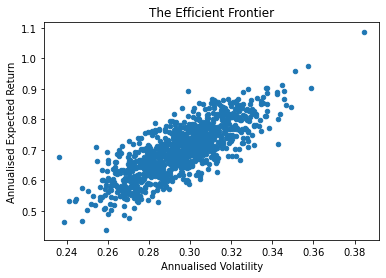

In [10]:
# According to MPT, there is an Efficient Frontier (EF) of portfolios
# Each portfolio offers a given amount of return for a given amount of risk
# The portfolio chosen by the investor from the EF can be optimised according to their acceptable level of risk
# Tangency Portfolio = poftfolio with the max Sharpe ratio (MSR), crosses the Capital Allocation Line
# Global Minimum Volatility Portfolio = portfolio with min volatility, leftmost edge portfolio    
sample_portfolio_df.plot.scatter(x='AnnualisedVolatility', y='AnnualisedReturns')
plt.title('The Efficient Frontier')
plt.xlabel('Annualised Volatility')
plt.ylabel('Annualised Expected Return')
plt.show()

In [11]:

# The Sharpe ratio is a common measure of risk-adjusted asset return
# NOTE: Sharpe ratios can change quite significantly over time
# Assume risk-free rate = 0, find optimal weights for MSR portfolio
sample_portfolio_df['Sharpe'] = (sample_portfolio_df['AnnualisedReturns'] - risk_free)/sample_portfolio_df['AnnualisedVolatility']
MSR_portfolio = sample_portfolio_df.sort_values(by=['Sharpe'], ascending=False)
MSR_weights = MSR_portfolio.iloc[0,:]
print(MSR_weights)
MSR_weights = MSR_portfolio.iloc[0,:num_stocks]
print("\nRange of Sharpe ratios:")
print(sample_portfolio_df['Sharpe'].describe()[['min', 'max']])

MSFT                    0.127139
AAPL                    0.058680
AMZN                    0.022005
TSLA                    0.080685
NVDA                    0.232274
GOOG                    0.198044
GOOGL                   0.215159
FB                      0.031785
ADBE                    0.012225
NFLX                    0.022005
AnnualisedReturns       0.893474
AnnualisedVolatility    0.298778
Sharpe                  2.990423
Name: 687, dtype: float64

Range of Sharpe ratios:
min    1.689001
max    2.990423
Name: Sharpe, dtype: float64


In [12]:

# Assume risk-free rate = 0, find optimal weights for GMV portfolio
GMV_portfolio = sample_portfolio_df.sort_values(by=['AnnualisedVolatility'], ascending=True)
GMV_weights = GMV_portfolio.iloc[0,:]
print(GMV_weights)
GMV_weights = GMV_portfolio.iloc[0,:num_stocks]

MSFT                    0.349020
AAPL                    0.074510
AMZN                    0.039216
TSLA                    0.023529
NVDA                    0.019608
GOOG                    0.243137
GOOGL                   0.184314
FB                      0.019608
ADBE                    0.031373
NFLX                    0.015686
AnnualisedReturns       0.677904
AnnualisedVolatility    0.236510
Sharpe                  2.866287
Name: 649, dtype: float64


In [13]:

# How did these hypothetical portfolios ACTUALLY perform?
stocks_df['MSRPortfolio'] = stocks_df.iloc[:,1:].mul(np.array(MSR_weights), axis=1).sum(axis=1)
stocks_df['GMVPortfolio'] = stocks_df.iloc[:,1:num_stocks+1].mul(np.array(GMV_weights), axis=1).sum(axis=1)
stocks_df.set_index('Date', inplace=True)

In [14]:
stocks_df

,MSFT,AAPL,AMZN,TSLA,NVDA,GOOG,GOOGL,FB,ADBE,NFLX,MSRPortfolio,GMVPortfolio
Date,,,,,,,,,,,,
2020-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2020-11-19,0.006348,0.005168,0.003722,0.025953,0.000856,0.009812,0.010301,0.003567,0.015104,0.005978,0.008074,0.008296
2020-11-20,-0.009557,-0.010958,-0.005653,-0.019348,-0.026227,-0.012319,-0.012618,-0.011871,-0.007483,0.007366,-0.015097,-0.011016
2020-11-23,-0.001331,-0.029743,-0.000326,0.065848,0.003992,-0.004207,-0.005080,-0.004709,-0.004990,-0.023800,0.001658,-0.003647
2020-11-24,0.017848,0.011594,0.006349,0.064252,-0.013870,0.019610,0.021035,0.031628,0.004538,0.013134,0.014811,0.018195
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-11,0.004927,-0.000338,-0.002743,-0.004157,0.031603,0.000832,-0.000871,0.000305,-0.006687,0.016494,0.007820,0.002206
2021-11-12,0.012905,0.014337,0.015162,-0.028293,0.000000,0.019745,0.019974,0.040123,0.022436,0.038064,0.011128,0.016071
2021-11-15,-0.001930,0.000067,0.005824,-0.019382,-0.012011,-0.001721,-0.001520,0.019566,0.003239,-0.004805,-0.004579,-0.001421


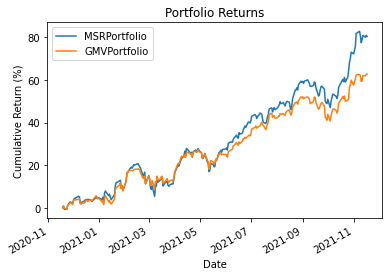

In [15]:
# construct a cumulative returns df, and plot
# GMV portfolio returns tend to be lower (lower risk) but more stable and consistent
cum_returns_df = ((1+stocks_df).cumprod() - 1) * 100
cum_returns_df[['MSRPortfolio', 'GMVPortfolio']].plot()
plt.title('Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.show()